In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('seaborn')

## Loading the Data

In [4]:
from sklearn.datasets import fetch_california_housing
cali = fetch_california_housing(as_frame=True)
data = pd.DataFrame(cali.data)
data.columns = cali.feature_names
data['PRICE'] = cali.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
data.shape

(20640, 9)

In [6]:
data.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

### Convert Data to Numpy Arrays

In [7]:
Y = data[['PRICE']].to_numpy()
X = data[cali.feature_names].to_numpy()
print(X.shape)
print(Y.shape)

(20640, 8)
(20640, 1)


## Vectorized Implementation
Most mathematical formulae that you learn about for Linear Regression are in scalar format. While it is easy to convert those into Python functions using simple for loops, we will take a minute to understand why vectorized implementations are so important and how to do them intuitively. 

In [8]:
# define two numpy arrays
a = np.array([[1,2],[3,4]])
b = np.array([[1,1],[1,1]])

display(a)
display(b)

array([[1, 2],
       [3, 4]])

array([[1, 1],
       [1, 1]])

In [9]:
# Numpy Array Addition 
display(a + b)

# Numpy Array Subtraction
display(a - b)

array([[2, 3],
       [4, 5]])

array([[0, 1],
       [2, 3]])

In [10]:
# Element-wise Multiplication
a*b # each element of a multiply with each element of b

array([[1, 2],
       [3, 4]])

In [16]:
display(a)
display(b)

array([[1, 2],
       [3, 4]])

array([[1, 1],
       [1, 1]])

In [11]:
# Dot Product
a@b #it multiplies each row of a with column of b

array([[3, 3],
       [7, 7]])

In [12]:
a.dot(b)

array([[3, 3],
       [7, 7]])

In [13]:
np.dot(a, b) #it multiplies each row of a with column of b

array([[3, 3],
       [7, 7]])

### Linear Regression Example
Here we will be looking at the most basic linear regression that uses root means squared error as the loss function. While we are not building a full class yet, it is important to know the difference between using a for-loop-based implementation versus a vectorized implementation.

#### The Hypothesis (Prediction)
A linear regression is simply the multiplication of each weight with the corresponding variable. Formally, the hypothesis is as follows:

basic line equation: y= mx + c
multiple elements: y= m1x1 + m2x2 + m3x3+ .........+ MnXn
![hypothesis](images/hypothesis.png) 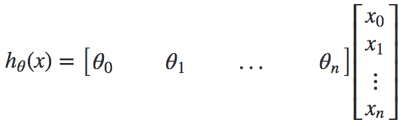
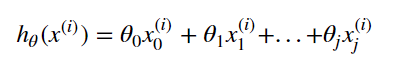

In [14]:
data.shape

(20640, 9)

In [15]:
# Initialize weights
weights = np.ones(shape=(X.shape[1], 1))

weights.shape

(8, 1)

In [20]:
weights

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

#### Hypothesis using for loop

In [27]:
## interpretation for single row in dataset
all_predictions = []
for data_point in X:
    display(data_point)
    print(data_point.shape)
    hypothesis= 0
    for theta , x in zip(weights, data_point):
        hypothesis+= theta*x
        print("theta:" , theta ,"x: ", x, "hypothesis: ",hypothesis)
    all_predictions.append(hypothesis)
    print(all_predictions)
    break

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

(8,)
theta: [1.] x:  8.3252 hypothesis:  [8.3252]
theta: [1.] x:  41.0 hypothesis:  [49.3252]
theta: [1.] x:  6.984126984126984 hypothesis:  [56.30932698]
theta: [1.] x:  1.0238095238095237 hypothesis:  [57.33313651]
theta: [1.] x:  322.0 hypothesis:  [379.33313651]
theta: [1.] x:  2.5555555555555554 hypothesis:  [381.88869206]
theta: [1.] x:  37.88 hypothesis:  [419.76869206]
theta: [1.] x:  -122.23 hypothesis:  [297.53869206]
[array([297.53869206])]


In [25]:
%%time
all_predictions = []
for data_point in X:
    hypothesis = 0
    for theta, x in zip(weights, data_point):
        hypothesis += theta*x
    
    all_predictions.append(hypothesis)
    
all_predictions[0:10]

CPU times: total: 0 ns
Wall time: 249 ms


[array([297.53869206]),
 array([2355.2612594]),
 array([483.03124181]),
 array([540.68145616]),
 array([545.99060154]),
 array([392.64198135]),
 array([1073.26077315]),
 array([1135.35760433]),
 array([1173.09905546]),
 array([1530.41425322])]

##### Hypothesis using Vectorized Operations
If you look at the code closely, you will notice that all we are doing is we are going over each **row** of the data, and multiplying the weights with all the columns. This means that if the data is of shape (m, n), and the weights are of shape (n, 1), then we can simply do a dot product and get the exact same result.

In [28]:
%%time
all_predictions = X @ weights #dot product

all_predictions[0:10]

CPU times: total: 0 ns
Wall time: 3.84 ms


array([[ 297.53869206],
       [2355.2612594 ],
       [ 483.03124181],
       [ 540.68145616],
       [ 545.99060154],
       [ 392.64198135],
       [1073.26077315],
       [1135.35760433],
       [1173.09905546],
       [1530.41425322]])

In [29]:
all_predictions.shape

(20640, 1)

In [30]:
X.shape

(20640, 8)

In [ ]:
## The resulting shape of array after dot product of array_1 and array_2 will be array_1.shape[0] * array_2.shape[1]
## Because each row of first array multiply with each column of 2nd array.
#Example: in our case X has shape of (20640,8) and weights has shape of (8,1)

## Object-Oriented Programming in Python
We will not be going into the details of OOP, that is an entire topic that requires a lot of theory, we will just be sticking to the basics for now. The first step in Object Oriented Programming is creating a **class**. A class is like a blueprint for how something should be defined. Once a class is defined, we can create **objects** of that class, which have all the essential *things* that are required in that class. What are those *things*?

Firstly, every class has some **attributes**, which are simply variables that exist within the class. Beyond that, a class can have **methods**, which are functions that only the class has access to.

The essentials for creating a class are:
- An \_\_init\_\_ function that is run whenever an object is created. The attributes created here are called *instance attributes*
- Other attributes can be created outside the \_\_init\_\_ function 

In [38]:
class Dog:

    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    species = "unknown"
    def print_attr(self):
        print(self.name)
        print(self.age)
        print(self.species)
        

In [39]:
kutta = Dog("Rambo", 5)
kutta.print_attr()

Rambo
5
unknown


If you ever want to know what attributes exist in a class (let's say you are using a scikit-learn class), you can use the built-in function called *dir()*

In [37]:
dir(Dog)
Dog.__dict__

mappingproxy({'__module__': '__main__',
              '__init__': <function __main__.Dog.__init__(self, name, age)>,
              'print_attr': <function __main__.Dog.print_attr(self)>,
              '__dict__': <attribute '__dict__' of 'Dog' objects>,
              '__weakref__': <attribute '__weakref__' of 'Dog' objects>,
              '__doc__': None})

It simply created a dictionary of the object and its attributes and returned it to us! This can be useful if we want to inspect the attributes of a particular class or store them.

In [40]:
from sklearn.linear_model import LinearRegression

In [42]:
dir(LinearRegression)
LinearRegression.__dict__
## all the parameters starts with underscore : _ are internally uses by sklearn to run linear regression model

mappingproxy({'__module__': 'sklearn.linear_model._base',
              '__annotations__': {'_parameter_constraints': dict},
              '__doc__': '\n    Ordinary least squares Linear Regression.\n\n    LinearRegression fits a linear model with coefficients w = (w1, ..., wp)\n    to minimize the residual sum of squares between the observed targets in\n    the dataset, and the targets predicted by the linear approximation.\n\n    Parameters\n    ----------\n    fit_intercept : bool, default=True\n        Whether to calculate the intercept for this model. If set\n        to False, no intercept will be used in calculations\n        (i.e. data is expected to be centered).\n\n    copy_X : bool, default=True\n        If True, X will be copied; else, it may be overwritten.\n\n    n_jobs : int, default=None\n        The number of jobs to use for the computation. This will only provide\n        speedup in case of sufficiently large problems, that is if firstly\n        `n_targets > 1` and se

### Static Methods vs Instance Methods
Have you noticed how there are a lot of scikit-learn functions that we can use without necessarily instantiating an object? These are called static methods. To run these, we do not need to create an object, we can simply use the class name to run those methods. See the example below!

In [54]:
class Random_function():

    @staticmethod
    def print_hello_world():
        print("Hello World")

    def instance_method(self):
        print(self)


# Static methods are those which we can call without instantiating an object which is random_function in our case see examples below

In [45]:
Random_function.print_hello_world()

Hello World


In [46]:
Random_function.instance_method()

TypeError: instance_method() missing 1 required positional argument: 'self'

In [50]:
some_object = Random_function()

In [53]:
some_object.instance_method()

This is how we are able to use functions such as "train_test_split" without creating any sort of scikit-learn object. We simply import the library (the class), or we import specific methods that we can use. 

Did you notice how when we created an object, the *self* parameter was automatically provided? This is precisely the difference between a static method and an instance method

## The Linear Regression Class
This is something we can code up from the ground up! But before we get into this, let's figure out all the steps required to make Linear Regression work.

The first is the .predict() luckily we already know how to make this. 

The second most important thing is the .fit(). Let's do a small recap of how gradient descent works using the Root Means Squared loss function.

### Gradient Descent process
There are many resources out there to understand Gradient Descent intuitively. We, however, will be focusing on converting the mathemetical equations of gradient descent to code. In its most simplest form, gradient descent can be carried out in two steps. 
1. Calculate the derivative of the loss function with respect to each weight
2. Update each weight

Let's dive into each of these using the Mean Squared Error function

####  Mean Squared Error
The equation is as follows:

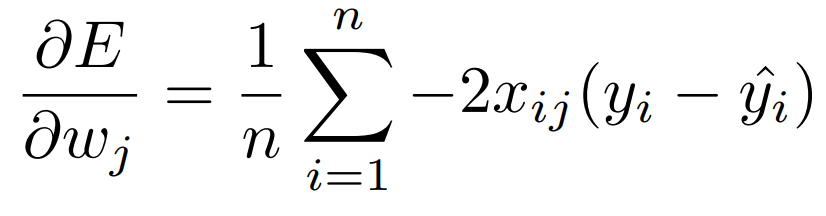

As you can probably tell, all this is doing is that it is finding the difference between each prediction and true value, squaring it, and then finding the mean (with an extra factor of 2 in the denominator). How would this look in code?

In [61]:
Y = np.array([1, 0, 0, 1])
Y_Prediction = np.array([1, 0, 0, 0])

In [75]:
#using for loop
total = 0
for true_value, pred_value in zip(Y, Y_Prediction):
    total = (true_value - pred_value)**2

total/len(Y) # to calculate mean


0.25

In [76]:
# using vectorise operation
def sample_mse_function(Y, Y_pred):
    return np.mean((Y - Y_pred) ** 2)


In [77]:
sample_mse_function(Y ,Y_Prediction)

0.25

#### MSE Derivative
We will not go into how we get to this derivative. If you are interested you can have a look at [this link](https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc). However, the formula is as follows:

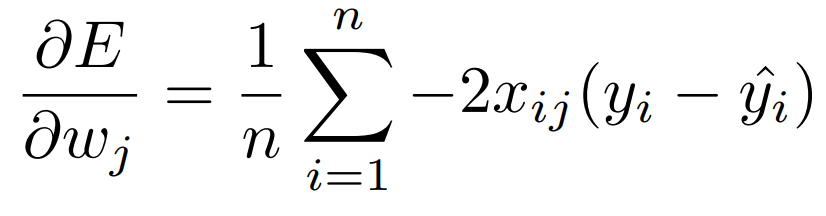

Let's try to dissect what is happening here. For each weight, we are multiplying the data point associated with that weight, with the difference between the predicted values and the real values. This sounds awful lot like a dot product. 

Consider this, if our X is a dataset of shape (n, m) where we have *n* data points and *m* features, then our Y values would be of size (n, 1), and our weights would be of size (m, 1). Thus, to get the partial derivative, we know that the shape of the partial derivative should be (m, 1). This gives us our first hint. The second thing we notice is that **for a particular weight** only the relevant data point is multiplied by the value of the difference. We'll look at this in more detail below

In [66]:
X = np.array([[2, 3, 4], [1, 2, 3], [5, 6, 7], [10, 11, 12]])

X.shape

(4, 3)

In [68]:
X

#Our toy data has 3 features, and 4 data points. Let's keep that in mind. Time to initialize the weights! 
# Our weights should be of length 3 for our example here.

array([[ 2,  3,  4],
       [ 1,  2,  3],
       [ 5,  6,  7],
       [10, 11, 12]])

In [67]:
weights = np.ones(shape=(X.shape[1], 1))

weights

array([[1.],
       [1.],
       [1.]])

In [78]:
#Now let's get our predictions.
Y_pred = X @ weights

Y_pred

array([[ 9.],
       [ 6.],
       [18.],
       [33.]])

Let's calculate the loss here, so we can compare it later

In [79]:
# Randomly choosing values for Y_true
Y_true = np.array([[8], [7], [19], [32]])

Y_true.shape

(4, 1)

In [80]:
sample_mse_function(Y_true, Y_pred)

1.0

Now let's actually implement the function! The most important thing when dealing with linear algebra in Python is to keep a track of the *shapes* of the matrices, and keep in mind what our goals are. We will see this in action

In [81]:
difference = Y_true - Y_pred

difference

array([[-1.],
       [ 1.],
       [ 1.],
       [-1.]])

In [82]:
X

array([[ 2,  3,  4],
       [ 1,  2,  3],
       [ 5,  6,  7],
       [10, 11, 12]])

Let us intuitively look at what we want to do. According to the equation above, we want to multiply the entire first column with the difference, and then divide it by *n*. We want to repeat this for all the columns, and eventually we can get a matrix of shape (m, 1), or in this case, (3, 1).

How do we do this? We simply take the transpose of X, and then we can do a simple dot product

In [83]:
X.T

array([[ 2,  1,  5, 10],
       [ 3,  2,  6, 11],
       [ 4,  3,  7, 12]])

In [85]:
partial_derivative = -X.T @ difference
partial_derivative

array([[6.],
       [6.],
       [6.]])

#### Weight update equation
This is the simplest bit. All we have to do is update the weights by subtracting the partial derivative from the weights after multiplying it with the learning rate

In [86]:
learning_rate = 0.001
weights -= learning_rate*partial_derivative

weights

array([[0.994],
       [0.994],
       [0.994]])

Let's see if our loss got any better?

In [87]:
sample_mse_function(Y_true, X@weights)

0.9597699999999988

In just one iteration, we reduce our loss by 0.05. 

#### Mean Absolute Error
Another popular loss function is the Mean Absolute Error function. We will go over this because the derivative of the MAE function is a step-wise function, which has to be programmed in a slightly different way. The equation for MAE is:
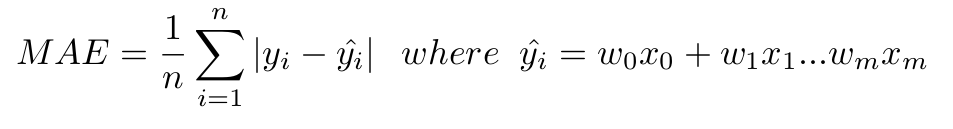


The interesting thing here is that the MAE is not differentiable at y_true == y_pred. However, you can create a step-wise function as follows:
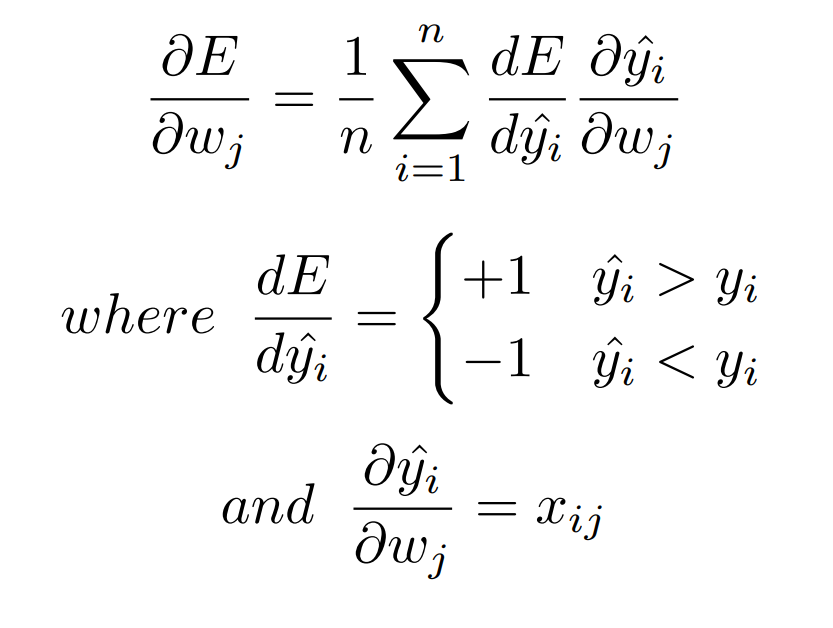


Now this may look very complicated, but step-wise functions are much easier to program than other functions! All we have to do is that if the prediction is greater than the true value, we have to put in a 1, if the prediction is smaller, we have to put in a 0. However, what do we do if the prediction is exactly the same as the true value? **Hint:** If the prediction and the true value is the same, do we want to change our weight? No, thus, if they are the same, we should keep it as zero. Let's have a look at how to implement these functions

In [88]:
def sample_mean_absolute_error(Y, Y_pred):
    return np.mean(np.absolute(Y - Y_pred))

There are many ways to implement a step-wise function using numpy. The most basic would be to write small functions and apply them across the entire matrix. However, a much simpler way is to use the [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function. 

In [89]:
a = np.array([1, 2, 3, 4, 5])

# First parameter is the condition
# Second parameter is the value if true
# Third parameter is the value if false
np.where(a < 3, 0, a)

array([0, 0, 3, 4, 5])

In [90]:
def sample_mae_derivative(X, Y, Y_pred):
    # Get the difference
    difference = Y_pred - Y

    # If difference is 0, then substitute the values with 0, otherwise keep the same value i.e. predicted value = actual value
    abs_derivative = np.where(difference == 0, 0, difference)
    
    # If the difference is positive, that means Y_pred > Y
    abs_derivative = np.where(abs_derivative > 0, 1, abs_derivative)
    
    # If the difference is negative, that means Y_pred < Y
    abs_derivative = np.where(abs_derivative < 0, -1, abs_derivative)
    return X.T @ abs_derivative

In [91]:
X = np.array([[2, 3, 4], [1, 2, 3], [5, 6, 7], [10, 11, 12]])
weights = np.ones(shape=(X.shape[1], 1))
Y_pred = X@weights
Y_true = np.array([[7], [6], [20], [30]])

display(Y_pred)
display(Y_true)

array([[ 9.],
       [ 6.],
       [18.],
       [33.]])

array([[ 7],
       [ 6],
       [20],
       [30]])

In [92]:
sample_mean_absolute_error(Y_true, Y_pred)

1.75

In [93]:
partial_derivative = sample_mae_derivative(X, Y_true, Y_pred)

partial_derivative

array([[7.],
       [8.],
       [9.]])

In [94]:
weights -= 0.001 * partial_derivative
Y_pred = X@weights
sample_mean_absolute_error(Y_true, Y_pred)

1.713999999999999

### Putting it all together

In [99]:
class LinearRegression():
    def __init__(self, 
                 loss_function= 'mse', max_iter=1000, learning_rate = 0.001,
                fit_intercept=True, tolerance=0.001):
        # Before we know the shape of the data, we cannot initialize weights
        self._weights = None
        self._max_iter = max_iter
        self._learning_rate = learning_rate
        self._fit_intercept = fit_intercept
        self._tolerance = tolerance
        self._loss_function = loss_function
        self._loss_dict = {
            'mse': self.mean_squared_loss,
            'abs': self.mean_absolute_loss,
        }
        self._derivative_dict = {
            'mse': self.mean_squared_loss_derivative,
            'abs': self.mean_absolute_loss_derivative,
        }
        self._loss_history = None
        self._weights_history = None
        
    # Trailing underscore indicates that a method is for internal use
    def _init_weights(self, num_features):
        # It is good practice to use a normal distribution with mean 0 for weight initialization
        # There are more complicated methods too! But this works
        self._weights = np.random.normal(size=(num_features,1))
        
    def fit(self, X, Y):
        assert len(X) == len(Y), "X and Y should be the same length"
        # If we want to add a "bias" term, or y_intercept
        if self._fit_intercept:
            X = np.concatenate((X, np.ones(shape=(len(X), 1))), axis=1)
        
        # Initialize the weights
        self._init_weights(X.shape[1])
        
        # Initialize two lists to store the history
        loss_history = []
        weights_history = []
        
        # Used for early stopping on model convergence
        previous_loss = np.inf
        converged = False
        for i in range(self._max_iter):
            # Get Prediction
            Y_pred = self.predict(X)
            
            # Calculate loss to monitor preformance
            loss = self._loss_dict[self._loss_function](Y, Y_pred)

            # Stop Gradient Descent if model has converged
            if np.abs(loss - previous_loss) < self._tolerance:
                converged = True
                break
            previous_loss = loss
            
            loss_history.append(loss)
            # Because a Numpy Array is an object that gets updated each time
            # We need to use .copy() to append it to get the weights
            weights_history.append(self._weights.reshape(-1).copy())
            
            # Calculate Partial Derivative
            partial_derivative = self._derivative_dict[self._loss_function](X, Y, Y_pred)
            
            # Update the weights
            self._weights -= self._learning_rate * partial_derivative
    
        if converged:
            print("Model Converged")
        else:
            print("Warning: Max iterations reached, model did not converge")
        
        self._loss_history = np.array(loss_history)
        self._weights_history = np.array(weights_history)
        
    def predict(self, X):
        Y_pred = X @ self._weights
        return Y_pred

    def get_coefficients(self):
        return self._weights
    
    def get_training_history(self):
        return self._loss_history, self._weights_history
    
    # MSE Losses
    @staticmethod
    def mean_squared_loss(Y, Y_pred):
        return np.mean((Y - Y_pred)**2)
    
    def mean_squared_loss_derivative(self, X, Y, Y_pred):
        return (-X.T @ (Y - Y_pred)) / len(X)
    
    # Absolute Losses
    @staticmethod
    def mean_absolute_loss(Y, Y_pred):
        return np.mean(np.absolute(Y-Y_pred))
    
    def mean_absolute_loss_derivative(self, X, Y, Y_pred):
        difference = Y_pred - Y
        # If difference is 0, then substitute the values with 0, otherwise keep the same value
        abs_derivative = np.where(difference == 0, 0, difference)
        # If the difference is positive, that means Y_pred > Y
        abs_derivative = np.where(abs_derivative > 0, 1, abs_derivative)
        # If the difference is negative, that means Y_pred < Y
        abs_derivative = np.where(abs_derivative < 0, -1, abs_derivative)
        return X.T @ abs_derivative

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
Y = data[['PRICE']].to_numpy()
X = data[cali.feature_names].to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)
print(Y.shape)

(20640, 8)
(20640, 1)


In [100]:
Regressor = LinearRegression(loss_function='mse', learning_rate=0.01)

In [101]:
Regressor.fit(X, Y)

Model Converged


In [102]:
loss_history, weights_history = Regressor.get_training_history()
print(loss_history.shape)
print(weights_history.shape)

(245,)
(245, 9)


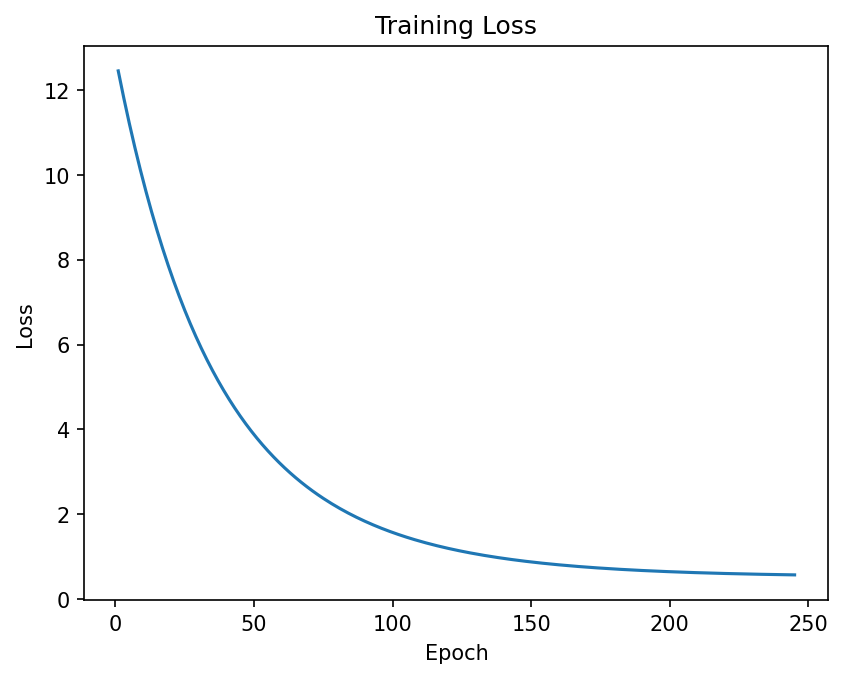

In [103]:
plt.figure(dpi=150)
iterations = range(1, len(loss_history) + 1)
plt.title("Training Loss")
plt.plot(iterations, loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

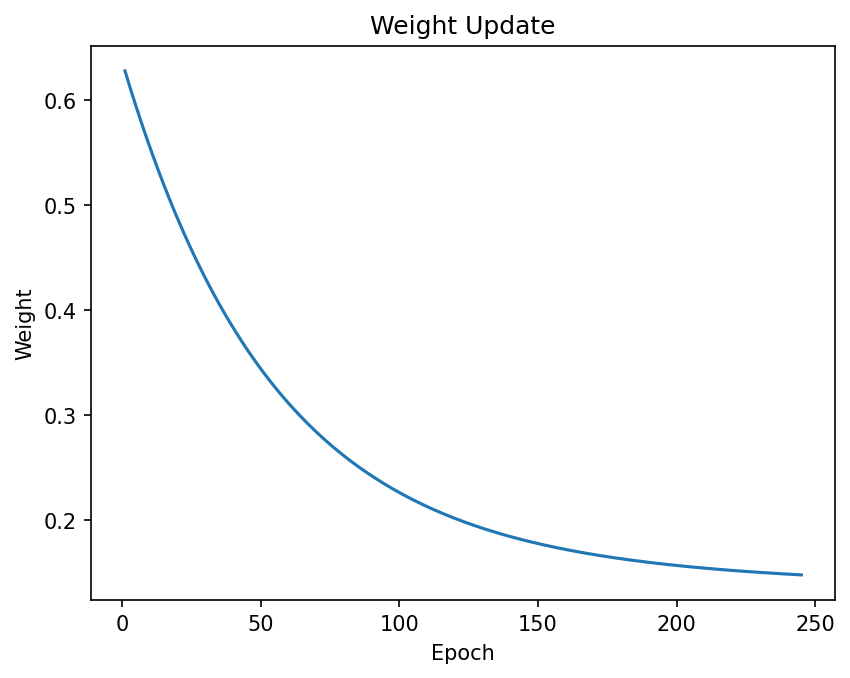

In [104]:
plt.figure(dpi=150)
plt.title("Weight Update")
# for i in range(weights_history.shape[1]):
#     plt.plot(iterations, weights_history[:, i])
plt.plot(iterations, weights_history[:, 1])
plt.xlabel("Epoch")
plt.ylabel("Weight")
plt.show()